# Let's have a look at the data!

In this recap, we'll work with this dataset from Kaggle: https://www.kaggle.com/datasets/saurabhbagchi/dish-network-hackathon?select=Train_Dataset.csv

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

data = pd.read_csv("data/Train_Dataset.csv")

/tmp/ipykernel_6830/55419546.py:5: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/Train_Dataset.csv")


In [2]:
data.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,Secondary,M,Male,CL,Home,0.028663,13957,1062,6123,383,NaN,1,1,0,Sales,2.0,2.0,6.0,17.0,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,Service,Graduation,M,Male,CL,Home,0.008575,14162,4129,7833,21,0.0,1,0,1,NaN,2.0,2.0,3.0,10.0,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,Service,Graduation dropout,W,Male,CL,Family,0.0228,16790,5102,NaN,331,NaN,1,0,0,Realty agents,2.0,2.0,4.0,NaN,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,Retired,Secondary,M,Male,CL,Home,0.010556,23195,365243,NaN,775,NaN,1,0,0,NaN,2.0,3.0,2.0,15.0,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,Commercial,Secondary,M,Female,CL,Home,0.020713,11366,2977,5516,4043,6.0,1,0,0,Laborers,4.0,1.0,3.0,NaN,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [3]:
X = data.drop(columns=["Default", "ID"])
y = data.Default

In [4]:
y.value_counts(normalize = True)

Default
0    0.919208
1    0.080792
Name: proportion, dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
X_train.dtypes

Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_

In [7]:
# Unfortunately we get an error here!
X_train["Client_Income"].astype(float)

ValueError: could not convert string to float: '$'

In [8]:
col_to_fix = ["Score_Source_3",
              "Client_Income",
              "Credit_Amount",
              "Loan_Annuity",
              "Age_Days",
              "Employed_Days",
              "Registration_Days",
              "ID_Days",
              "Population_Region_Relative"
             ]

# Building the pipeline and fixing that type!

In [9]:
import string

print(string.punctuation)
print(string.ascii_letters)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ


In [10]:
string.punctuation.replace(".", "") + string.ascii_letters

'!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [11]:
def clean_df(X):

    def clean_value(value):
        unwanted_char = string.punctuation.replace(".", "") + string.ascii_letters
        for tag in unwanted_char:
            value = value.replace(tag, "")
        value = np.nan if not value else value
        return float(value)

    X = pd.DataFrame(X)
    X = X.astype(str).map(clean_value)
    return X


In [12]:
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector

In [13]:
cleaner = FunctionTransformer(clean_df)

type_cleaner = ColumnTransformer(
    [("type_cleaner", cleaner, col_to_fix)],
    remainder="passthrough"
    ).set_output(transform = "pandas")

In [14]:
type_cleaner.fit_transform(X_train)

,type_cleaner__Score_Source_3,type_cleaner__Client_Income,type_cleaner__Credit_Amount,type_cleaner__Loan_Annuity,type_cleaner__Age_Days,type_cleaner__Employed_Days,type_cleaner__Registration_Days,type_cleaner__ID_Days,type_cleaner__Population_Region_Relative,remainder__Car_Owned,remainder__Bike_Owned,remainder__Active_Loan,remainder__House_Own,remainder__Child_Count,remainder__Accompany_Client,remainder__Client_Income_Type,remainder__Client_Education,remainder__Client_Marital_Status,remainder__Client_Gender,remainder__Loan_Contract_Type,remainder__Client_Housing_Type,remainder__Own_House_Age,remainder__Mobile_Tag,remainder__Homephone_Tag,remainder__Workphone_Working,remainder__Client_Occupation,remainder__Client_Family_Members,remainder__Cleint_City_Rating,remainder__Application_Process_Day,remainder__Application_Process_Hour,remainder__Client_Permanent_Match_Tag,remainder__Client_Contact_Work_Tag,remainder__Type_Organization,remainder__Score_Source_1,remainder__Score_Source_2,remainder__Social_Circle_Default,remainder__Phone_Change,remainder__Credit_Bureau
4664,0.675413,22500.0,94050.00,3729.60,NaN,2686.0,2928.0,4258.0,0.026392,1.0,0.0,1.0,1.0,0.0,Relative,Service,Secondary,S,Male,NaN,Home,3.0,1,1,1,Sales,1.0,2.0,5.0,13.0,Yes,Yes,Business Entity Type 3,0.366184,0.515763,0.1464,528.0,0.0
99005,0.403142,13500.0,67500.00,1780.65,9921.0,551.0,776.0,1346.0,0.026392,0.0,0.0,0.0,0.0,0.0,Alone,Service,Graduation,M,Male,CL,Home,NaN,1,1,1,Core,2.0,2.0,2.0,14.0,Yes,Yes,Bank,NaN,0.591244,0.2619,338.0,2.0
48107,0.157595,10350.0,13940.55,769.05,10475.0,3637.0,10241.0,3158.0,0.020246,0.0,1.0,1.0,1.0,2.0,Alone,NaN,Secondary,M,Male,CL,Family,NaN,1,0,0,Sales,4.0,3.0,4.0,7.0,Yes,Yes,Self-employed,0.454473,0.319012,NaN,1040.0,7.0
97976,NaN,14850.0,72000.00,3050.55,22194.0,365243.0,8110.0,5256.0,0.072508,0.0,0.0,0.0,1.0,0.0,Alone,Retired,Secondary,S,Male,CL,Home,NaN,1,0,1,NaN,1.0,1.0,2.0,NaN,Yes,Yes,XNA,NaN,0.631997,0.2598,334.0,0.0
78034,0.560284,11250.0,63450.00,NaN,12924.0,285.0,7029.0,4648.0,0.014520,0.0,0.0,0.0,0.0,0.0,Alone,Service,Junior secondary,D,Female,CL,Family,NaN,1,0,0,Laborers,1.0,2.0,4.0,6.0,Yes,No,Business Entity Type 2,0.172293,0.229854,NaN,1588.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93313,NaN,14400.0,63448.20,2471.40,11396.0,1584.0,4586.0,NaN,NaN,1.0,1.0,0.0,1.0,1.0,Relative,Commercial,Secondary,M,Female,CL,Home,22.0,1,0,1,Laborers,3.0,2.0,2.0,14.0,Yes,Yes,Industry: type 4,NaN,0.117043,NaN,323.0,NaN
24114,NaN,11250.0,23985.00,2336.40,23171.0,365243.0,5390.0,4552.0,0.009334,0.0,1.0,0.0,1.0,0.0,Alone,Retired,Secondary,NaN,NaN,CL,Home,NaN,1,0,0,NaN,2.0,2.0,5.0,13.0,Yes,Yes,XNA,NaN,0.540016,0.0938,764.0,1.0
14180,NaN,18000.0,58476.60,2331.90,20951.0,3479.0,8343.0,4050.0,0.006233,0.0,1.0,1.0,1.0,0.0,Alone,NaN,Secondary,M,Female,NaN,Home,NaN,1,0,0,Laborers,2.0,2.0,3.0,15.0,Yes,Yes,Business Entity Type 3,NaN,0.443989,NaN,12.0,NaN
105783,0.812823,4500.0,22500.00,1613.25,16056.0,1233.0,3691.0,4327.0,0.010556,0.0,1.0,1.0,1.0,0.0,Alone,Service,Secondary,M,Male,CL,Home,NaN,1,1,1,Laborers,2.0,3.0,4.0,15.0,Yes,Yes,Business Entity Type 3,0.675231,0.573423,0.1732,2750.0,0.0


In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [16]:
num_preproc = Pipeline([
    ("num_imputer", SimpleImputer(strategy="constant", fill_value=0.)),
    ("scaler", StandardScaler())
])

In [17]:
cat_preproc = Pipeline([
    ("cat_imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [18]:
preproc = ColumnTransformer([
    ("num_tr", num_preproc, make_column_selector(dtype_include=["float64", "int64"])),
    ("cat_tr", cat_preproc, make_column_selector(dtype_include=["object"]))
])

In [19]:
clean_preproc = Pipeline([
    ("cleaner", type_cleaner),
    ("preprocessing", preproc)])

In [20]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("clean_preproc", clean_preproc),
    ("classifier", LogisticRegression(max_iter=1000))
])

pipe

/home/saranjthilak92/.pyenv/versions/3.12.9/envs/lewagon/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('clean_preproc',
                 Pipeline(steps=[('cleaner',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('type_cleaner',
                                                                   FunctionTransformer(func=<function clean_df at 0x7faac91cca40>),
                                                                   ['Score_Source_3',
                                                                    'Client_Income',
                                                                    'Credit_Amount',
                                                                    'Loan_Annuity',
                                                                    'Age_Days',
                                                                    'Employed_Days',
                                                                    'Registration_Days',
                                                                    'ID_Days',
                                                                    'Population_Region_Relative'])])),
                                 (...
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7faaca36b380>),
                                                                  ('cat_tr',
                                                                   Pipeline(steps=[('cat_imputer',
                                                                                    SimpleImputer(fill_value='Missing',
                                                                                                  strategy='constant')),
                                                                                   ('ohe',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7faaca36b560>)]))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score(pipe, X_train, y_train).mean()

0.919166221589092

# Wait, are we doing things correctly?

## What's wrong with cross validation?

When tackling imbalanced datasets 🌓, let's arm ourselves with Stratified K-Fold Cross-Validation! 🛡️🔄

Why, you ask? 🤔

1. Regular K-Fold 🔄: Might leave out the minority class in some folds 😨! Leads to less reliable model evaluation. 😢


2. Stratified K-Fold 🔀: Makes sure that each fold ⚙️ has a good proportion of both majority and minority classes. 🎉


3. Reliable Evaluation 🎯: More representative of real-world performance. 🌍 Keeps both classes in check! 🤹‍♂️


Better Model Tuning 🚀: Parameters honed with a clearer understanding of how your model handles the minority class! 🕵️‍♀️

In [23]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5)

cross_val_score(pipe, X_train, y_train, cv=cv).mean()

0.919166221589092

## What's wrong with accuracy?

For imbalanced datasets 🌓, precision-recall AUC 📈 is king! 🤴

Why? 🤔

Accuracy 🎯 can be deceptive in imbalanced datasets. 😱


High recall? Great, but beware of false positives. 🚨


Precision-Recall AUC considers both precision & recall across thresholds. 🌟 More area under the curve = Better model! 💪


Use average_precision_score in sklearn 🛠️ for a single-number summary. 🧮

Let's have a look at this: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [24]:
cv = StratifiedKFold(n_splits=5)
cross_val_score(pipe, X_train, y_train, cv=cv, scoring="average_precision").mean()

0.1778060489731291

In [29]:
pipe.fit(X_train, y_train)

/home/saranjthilak92/.pyenv/versions/3.12.9/envs/lewagon/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('clean_preproc',
                 Pipeline(steps=[('cleaner',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('type_cleaner',
                                                                   FunctionTransformer(func=<function clean_df at 0x7faac91cca40>),
                                                                   ['Score_Source_3',
                                                                    'Client_Income',
                                                                    'Credit_Amount',
                                                                    'Loan_Annuity',
                                                                    'Age_Days',
                                                                    'Employed_Days',
                                                                    'Registration_Days',
                                                                    'ID_Days',
                                                                    'Population_Region_Relative'])])),
                                 (...
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7faaca36b380>),
                                                                  ('cat_tr',
                                                                   Pipeline(steps=[('cat_imputer',
                                                                                    SimpleImputer(fill_value='Missing',
                                                                                                  strategy='constant')),
                                                                                   ('ohe',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7faaca36b560>)]))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [30]:
X_test.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Occupation,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
72090,11250,0.0,1.0,1.0,0.0,2.0,45000.0,2188.8,Alone,Govt Job,Secondary,NaN,Male,CL,Home,0.010147,10150,1162,2774,2761,NaN,1,1,1,Core,4.0,2.0,5.0,9.0,No,Yes,Kindergarten,0.116349,0.723169,0.28813,NaN,998.0,4.0
2322,7650,0.0,0.0,1.0,1.0,0.0,64008,2997,Alone,Service,Secondary,M,Male,CL,Home,0.020246,13127,144,1824,1168,NaN,1,0,0,Laborers,2.0,3.0,4.0,8.0,Yes,Yes,Housing,NaN,0.239566,0.519097,NaN,1988.0,2.0
29120,9000,1.0,1.0,0.0,1.0,0.0,135000.0,4862.25,Alone,Service,Graduation,M,Male,CL,Home,0.026392,15484,4974,7194,4233,7.0,1,0,0,High skill tech,2.0,2.0,3.0,13.0,Yes,No,Transport: type 4,0.803901,0.542177,0.621226338,0.4959,0.0,0.0
63005,12150.0,0.0,1.0,0.0,1.0,0.0,83560.5,2456.1,Alone,Retired,Secondary,W,Male,CL,Home,0.015221,20668,365243,6142,4173,NaN,1,0,0,NaN,1.0,NaN,5.0,13.0,Yes,Yes,XNA,NaN,NaN,0.385915,NaN,534.0,2.0
6137,NaN,0.0,0.0,1.0,1.0,0.0,45000,2732.4,Relative,Retired,Secondary,S,Male,CL,Home,0.010966,22966,365243,9204,4835,NaN,1,0,0,NaN,1.0,2.0,3.0,11.0,Yes,Yes,XNA,NaN,0.502642,0.546023,0.1031,2301.0,2.0


In [31]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

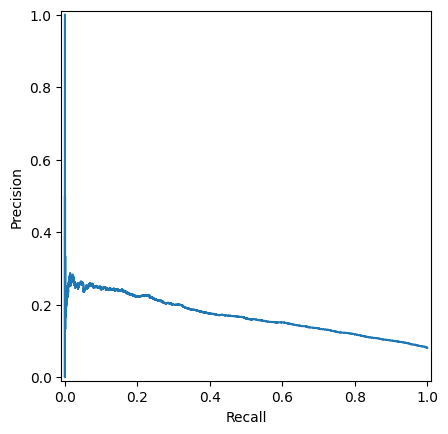

In [32]:
y_pred_prob = pipe.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

## Let's try a more complex model

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
pipe = Pipeline([
    ("cleaner", type_cleaner),
    ("preprocessing", preproc),
    ("classifier", RandomForestClassifier())
])

In [35]:
cv = StratifiedKFold(n_splits=5)
cross_val_score(pipe, X_train, y_train, cv=cv, scoring="average_precision").mean()

0.35552189013438096

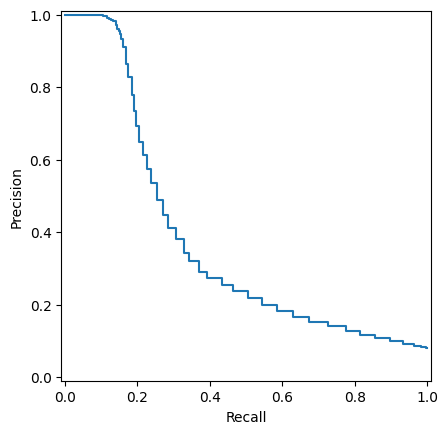

In [36]:
pipe.fit(X_train, y_train)
y_pred_prob = pipe.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [37]:
y_pred_prob

array([0.06, 0.11, 0.01, ..., 0.03, 0.02, 0.04])

## Let's take the class imbalance into account

In [38]:
pipe = Pipeline([
    ("cleaner", type_cleaner),
    ("preprocessing", preproc),
    ("classifier", RandomForestClassifier(class_weight="balanced"))
])

In [39]:
cv = StratifiedKFold(n_splits=5)
cross_val_score(pipe, X_train, y_train, cv=cv, scoring="average_precision").mean()

0.3571930380387113

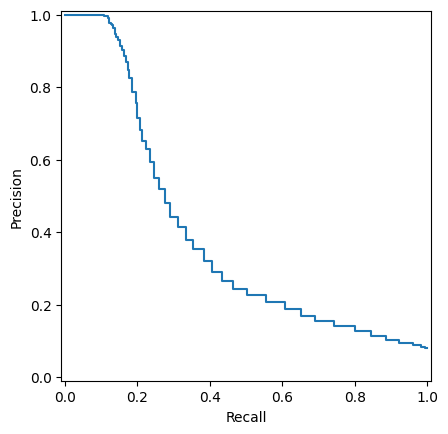

In [40]:
pipe.fit(X_train, y_train)
y_pred_prob = pipe.predict_proba(X_test)[:,1]


precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

# Model Calibration

Picture this: You’ve built a stellar model 🌟 that spits out probabilities. You’re happy, your model's happy, but WAIT! Are those probabilities trustworthy? 🤔

🎺 Enter: Model Calibration! 🎺

Here’s why it's like the cherry 🍒 on top of your model sundae:

1. Trustworthy Probabilities 📊: When your model says there’s an 80% chance of rain ☔, it should rain about 80% of the time! Calibration ensures that the output probabilities reflect the true likelihood of events.


2. Informed Decisions 💡: With calibrated probabilities, you can make wiser decisions! It’s like knowing exactly how much dragon repellent 🐲 to carry on your quest.


3. Model Comparison 🤺: Two models enter, one model leaves! When comparing models, well-calibrated probabilities help you pick the true hero 🦸 that can wield the Excalibur 🗡️ of predictions!


4. Better Risk Management 💼: In finance, healthcare or any domain with high stakes, making decisions is like juggling with potions 🧪. Calibrated probabilities keep the potion mix just right!


5. Custom Thresholds 🚥: Not all battles are fought the same! Sometimes, you need to change your strategy. Calibrated probabilities let you set custom thresholds to optimize for precision or recall, depending on your quest's objective.


Let's have a look at this: https://scikit-learn.org/stable/modules/calibration.html#calibration

In [41]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay, calibration_curve

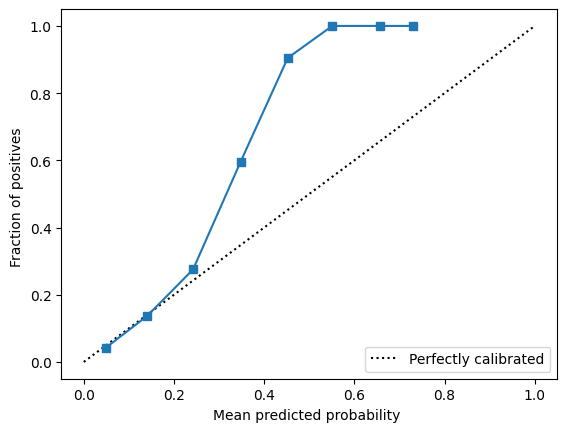

In [42]:
prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)

disp = CalibrationDisplay(prob_true, prob_pred, y_pred_prob)
disp.plot()

In [43]:
calibrated_clf = CalibratedClassifierCV(pipe, cv=cv)
calibrated_clf.fit(X_train, y_train)

/home/saranjthilak92/.pyenv/versions/3.12.9/envs/lewagon/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


CalibratedClassifierCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                       estimator=Pipeline(steps=[('cleaner',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('type_cleaner',
                                                                                   FunctionTransformer(func=<function clean_df at 0x7faac91cca40>),
                                                                                   ['Score_Source_3',
                                                                                    'Client_Income',
                                                                                    'Credit_Amount',
                                                                                    'Loan_Annuity',
                                                                                    'Age_Days',
                                                                                    'Employed_Days',
                                                                                    'R...
                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7faaca36b380>),
                                                                                  ('cat_tr',
                                                                                   Pipeline(steps=[('cat_imputer',
                                                                                                    SimpleImputer(fill_value='Missing',
                                                                                                                  strategy='constant')),
                                                                                                   ('ohe',
                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                  sparse_output=False))]),
                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7faaca36b560>)])),
                                                 ('classifier',
                                                  RandomForestClassifier(class_weight='balanced'))]))

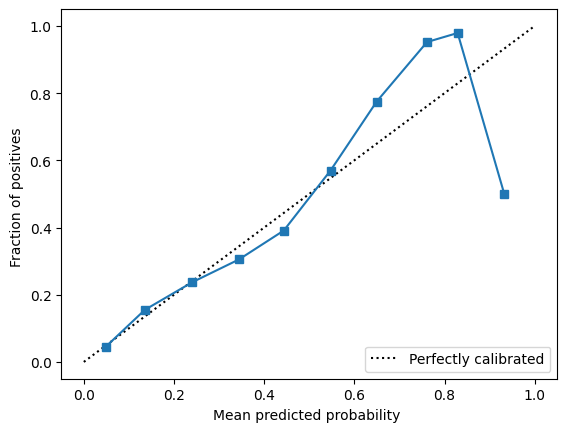

In [44]:
y_pred_prob = calibrated_clf.predict_proba(X_test)[:,1]

prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)

disp = CalibrationDisplay(prob_true, prob_pred, y_pred_prob)
disp.plot()

In [45]:
# N.B. This can take quite some time to run!
cv = StratifiedKFold(n_splits=5)
cross_val_score(calibrated_clf, X_train, y_train, cv=cv, scoring="average_precision").mean()

0.3759629382642327

# Next Steps

We have a calibrated model, but our job is not over! If we're not satisfied with the performances we can perform:
- Parameter Tuning (Grid Search)
- Try even more advanced models
- Perform Oversampling or Undersampling

Let's have a quick look at the last option, by using the Imbalanced-Learn library

In [46]:
#!pip install imbalanced-learn

In [47]:
X_train_preproc = clean_preproc.fit_transform(X_train)

In [48]:
print(X_train_preproc.shape)
print(y_train.value_counts())

(97484, 151)
Default
0    89608
1     7876
Name: count, dtype: int64


## Oversampling - SMOTE

SMOTE is like an artist that creates new, synthetic examples to boost the minority class. It does this by interpolating between existing minority examples. The aim is to make the minority class larger and therefore more significant for the model. But be careful! SMOTE can sometimes create noise by generating synthetic examples too far from the original ones.

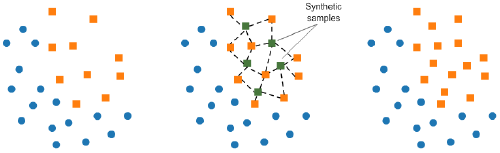

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_preproc, y_train)

print(X_train_res.shape)
print(y_train_res.shape)
y_train_res.value_counts()

(179216, 151)
(179216,)


Default
0    89608
1    89608
Name: count, dtype: int64

## Undersampling - Random Under Sampler

Imagine RUS as a waste disposal unit that randomly discards some examples from the majority class to balance the dataset. By doing so, it makes the model focus more on the minority class. However, since it throws away data, it might discard useful information as well. So use RUS with caution!

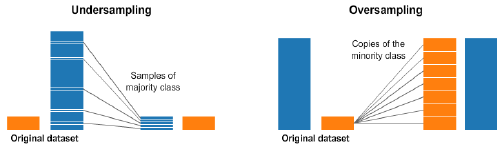

In [50]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train_preproc, y_train)

print(X_train_res.shape)
print(y_train_res.shape)
y_train_res.value_counts()


(15752, 151)
(15752,)


Default
0    7876
1    7876
Name: count, dtype: int64

## Undersampling - Tomek Link

Tomek Links act like a magnet that attracts pairs of close majority and minority class examples (forming a 'link'). If a majority class example forms a Tomek Link, it's removed, helping to clean the borderline between classes. This removal of 'borderline' majority examples can make the model less biased towards the majority class. But, this method may not be sufficient if the imbalance is severe.

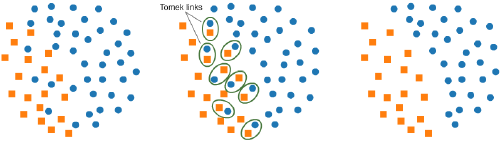

In [51]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_train_res, y_train_res = tl.fit_resample(X_train_preproc, y_train)

print(X_train_res.shape)
print(y_train_res.shape)
y_train_res.value_counts()


(95977, 151)
(95977,)


Default
0    88101
1     7876
Name: count, dtype: int64